# **Coins Classifier**
Model for classifying coins into 4 classes: 1, 2, 5, 10

### **Importing necessary libraries**

In [1]:
import numpy as np
import tensorflow as tf
from keras import layers, models
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
import seaborn as sns
from sklearn.metrics import classification_report
from keras.callbacks import ModelCheckpoint

2023-12-01 09:43:42.069869: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-01 09:43:42.069909: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-01 09:43:42.069940: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-01 09:43:42.076931: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
IMAGE_SIZE = (170, 320)
BATCH_SIZE = 10
EPOCHS = 20

### **Splitting dataset for training and validation**

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

path = 'data/multiclass/coins/'

train_generator = train_datagen.flow_from_directory(
    path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 527 images belonging to 4 classes.


Found 129 images belonging to 4 classes.


### **Checkpoints**

In [4]:
checkpoint_path = "checkpoints/coins-classifier.h5"

In [5]:
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    mode='max',
    verbose=1
)

### **CNN**

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(170, 320, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

2023-12-01 09:43:51.765645: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-01 09:43:51.771933: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-01 09:43:51.772387: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 168, 318, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 84, 159, 16)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 157, 32)       4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 41, 78, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 76, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 19, 38, 64)        0

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### **Training model**

In [8]:
history = model.fit(
    train_generator, 
    epochs=EPOCHS, 
    validation_data=validation_generator,
    callbacks=[checkpoint_callback]
)

Epoch 1/20


2023-11-29 18:12:42.224943: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-29 18:12:43.702268: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7ff80404c300 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-29 18:12:43.702330: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2023-11-29 18:12:43.709081: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-29 18:12:43.801757: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


53/53 [==============================] - ETA: 0s - loss: 1.4713 - accuracy: 0.2713
Epoch 1: val_accuracy improved from -inf to 0.26357, saving model to checkpoints/coins-classifier.h5
53/53 [==============================] - 42s 729ms/step - loss: 1.4713 - accuracy: 0.2713 - val_loss: 1.3529 - val_accuracy: 0.2636
Epoch 2/20


/home/hrishi/Miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


53/53 [==============================] - ETA: 0s - loss: 1.3504 - accuracy: 0.2979
Epoch 2: val_accuracy improved from 0.26357 to 0.44186, saving model to checkpoints/coins-classifier.h5
53/53 [==============================] - 38s 723ms/step - loss: 1.3504 - accuracy: 0.2979 - val_loss: 1.3235 - val_accuracy: 0.4419
Epoch 3/20
53/53 [==============================] - ETA: 0s - loss: 1.3409 - accuracy: 0.3264
Epoch 3: val_accuracy improved from 0.44186 to 0.52713, saving model to checkpoints/coins-classifier.h5
53/53 [==============================] - 39s 744ms/step - loss: 1.3409 - accuracy: 0.3264 - val_loss: 1.1484 - val_accuracy: 0.5271
Epoch 4/20
53/53 [==============================] - ETA: 0s - loss: 1.2357 - accuracy: 0.4080
Epoch 4: val_accuracy improved from 0.52713 to 0.58915, saving model to checkpoints/coins-classifier.h5
53/53 [==============================] - 38s 714ms/step - loss: 1.2357 - accuracy: 0.4080 - val_loss: 0.9896 - val_accuracy: 0.5891
Epoch 5/20
53/53 [===

### **Saving trained model**

In [9]:
model.save('saved-models/coins-classifier.h5')

### **Model metrics and visualization**

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

#### **Accuracy**

In [11]:
avg_train_acc = np.mean(history.history['accuracy'])
avg_val_acc = np.mean(history.history['val_accuracy'])

print(f'Average Training Accuracy: {avg_train_acc*100}%')
print(f'Average Validation Accuracy: {avg_val_acc*100}%')

Average Training Accuracy: 54.45920318365097%
Average Validation Accuracy: 52.790697664022446%


#### **Confusion Matrix**

13/13 [==============================] - 9s 643ms/step


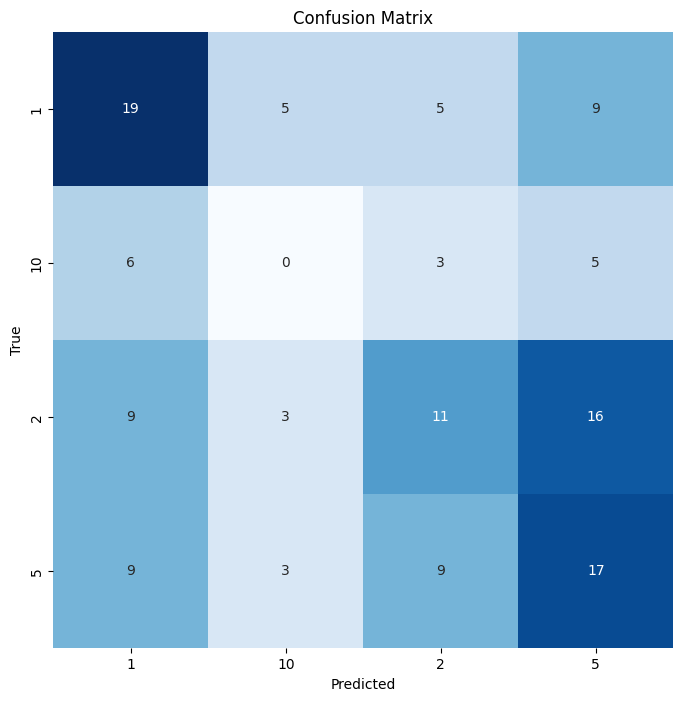

In [12]:
# Generate predictions
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Visualize confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=train_generator.class_indices,
            yticklabels=train_generator.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### **Classification Report**

In [14]:
class_report = classification_report(y_true, y_pred_classes, target_names=train_generator.class_indices.keys())
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           1       0.44      0.50      0.47        38
          10       0.00      0.00      0.00        14
           2       0.39      0.28      0.33        39
           5       0.36      0.45      0.40        38

    accuracy                           0.36       129
   macro avg       0.30      0.31      0.30       129
weighted avg       0.36      0.36      0.36       129



#### **Loss and Accuracy graphs**

In [15]:
epochs_range = range(1, EPOCHS + 1)

plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

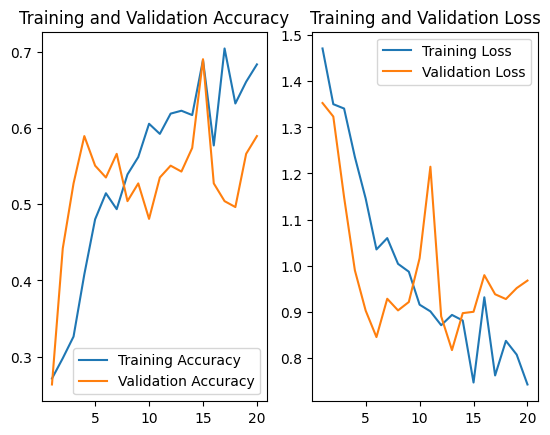

In [16]:
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()